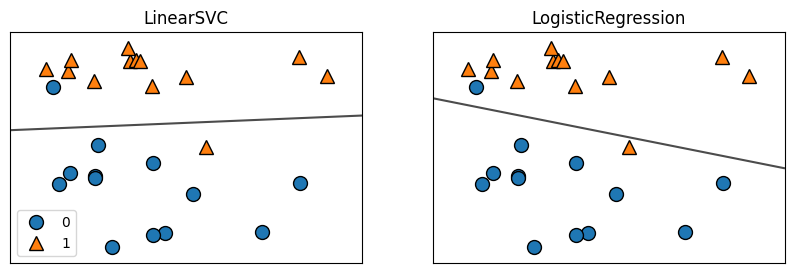

In [16]:
import mglearn
import mglearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_forge()
fig,axes = plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
axes[0].legend()


In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train,y_train)
print("logreg score (train): {}".format(logreg.score(X_train, y_train)))
print("logref score (test): {}".format(logreg.score(X_test, y_test)))

logreg score (train): 0.9577464788732394
logref score (test): 0.958041958041958


In [18]:
logreg100 = LogisticRegression(C=100,max_iter=10000).fit(X_train,y_train)
print("logreg score (train): {}".format(logreg100.score(X_train, y_train)))
print("logref score (test): {}".format(logreg100.score(X_test, y_test)))

logreg score (train): 0.9788732394366197
logref score (test): 0.965034965034965


In [19]:
logreg001 = LogisticRegression(C=0.01,max_iter=10000).fit(X_train,y_train)
print("logreg score (train): {}".format(logreg001.score(X_train, y_train)))
print("logref score (test): {}".format(logreg001.score(X_test, y_test)))

logreg score (train): 0.9530516431924883
logref score (test): 0.951048951048951


#正則化の強さの指標C  
-大きい：正則化が弱まる，訓練データに適合を重視，個々のデータポイント分類に厳密  
-小さい：正則化が強まる，パラメータベクトルwのノルムが0に近づき，データの傾向を捉えて全体に適合  

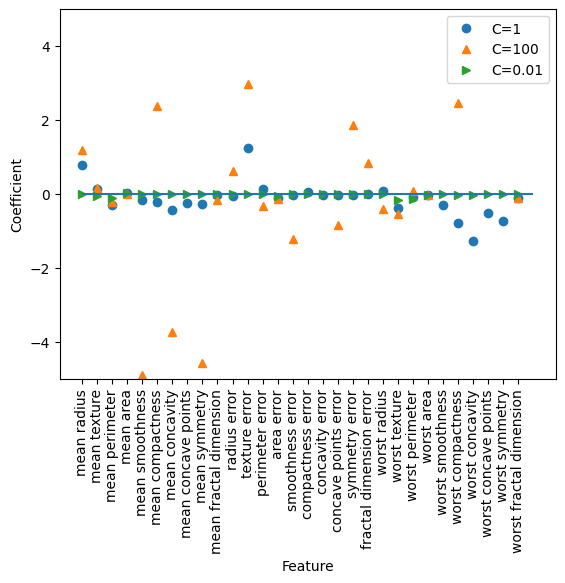

In [20]:


plt.plot(logreg.coef_.T,"o",label="C=1")
plt.plot(logreg100.coef_.T,"^",label="C=100")
plt.plot(logreg001.coef_.T,">",label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.legend()

#L2正則化  
C=100:正則化が弱すぎて，過学習のリスク，ノルムが大きく  
C=1:正則化が適度  
C=0.01:正則化が強く，モデルが単純になり，ノルムが0に近づく，学習不足のリスク

score(train) : 0.9131455399061033
score(test) : 0.9230769230769231
score(train) : 0.960093896713615
score(test) : 0.958041958041958
score(train) : 0.9859154929577465
score(test) : 0.9790209790209791


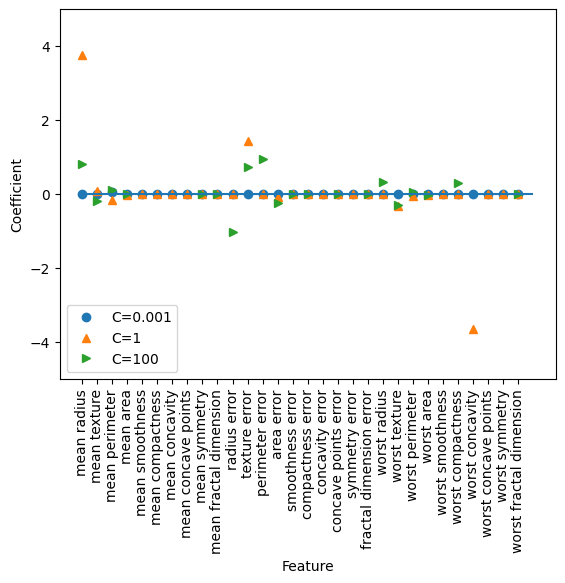

In [28]:
for C,marker in zip([0.001,1,100],["o","^",">"]):
    lr_1l = LogisticRegression(C=C,penalty="l1",solver="liblinear", max_iter=10000).fit(X_train,y_train)
    print("score(train) : {}".format(lr_1l.score(X_train,y_train)))
    print("score(test) : {}".format(lr_1l.score(X_test,y_test)))
    plt.plot(lr_1l.coef_.T,"{}".format(marker),label="C={}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.legend(loc=3)

L1ノルム正則化では，より強い正則化となり，殆どのパラメータが0になる